In [1]:
import pandas
import numpy
import networkx
import igraph

%matplotlib inline 
import matplotlib.pyplot as pyplot

import geopandas

## Read world city network data
This is dataset 11 from [https://www.lboro.ac.uk/gawc/datasets/da11.html](https://www.lboro.ac.uk/gawc/datasets/da11.html)

In [4]:
wcn = pandas.read_csv('da11-1.csv', index_col=0)
wcn

,Ernst & Young,Arthur Andersen,MSI,IGAF,AGN,BDO,Grant Thornton,Horwath,KPMG,Summit & Baker,...,Mercer,Boston,Deloitte,BoozeA&M,A.T. Kearney,McKinsey,Bain,Compass,Andersen Consulting,Gemini
ABERDEEN,2,0,0,0,0,0,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
ABIJAN,3,0,0,0,0,0,0,0,2,0,...,0,0,2,0,0,0,0,0,0,0
ABU DHABI,2,2,0,0,2,0,0,2,2,0,...,0,0,2,2,0,0,0,0,2,0
ACCRA,0,0,0,0,0,0,2,0,2,0,...,0,0,2,0,0,0,0,0,0,0
ADDIS ABABA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAONDE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YEREVAN,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
YOKOHAMA,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
ZAGREB,3,2,0,0,2,0,2,2,2,0,...,0,0,0,0,0,0,0,0,0,0


### Function to throw away all the entries less than cut value `x`

In [5]:
def cut_table_at(table, x):
    tbl = table.copy()
    tbl[tbl[:] < x] = -99
    tbl[tbl[:] >= x] = 1
    tbl[tbl[:] == -99] = 0
    return tbl[list(tbl.sum(axis=1) > 0)]

Now make a dictionary of all the possible cuts, from 1 to 5

In [6]:
def make_network_from_incidence_table(tbl):
    incidence_matrix = numpy.array(tbl)
    adj_matrix = incidence_matrix.dot(incidence_matrix.transpose())
    numpy.fill_diagonal(adj_matrix, 0)
    G = networkx.Graph(adj_matrix)
    return networkx.relabel_nodes(G, dict(zip(G.nodes(), list(tbl.index))))

In [7]:
cuts = dict(zip(range(1, 6), [cut_table_at(wcn, x) for x in range(1, 6)]))

Get one of the networks that results

In [8]:
Gnx = make_network_from_incidence_table(cuts[4])

In [13]:
Gnx.nodes()

NodeView(('ABIJAN', 'AMSTERDAM', 'ATHENS', 'BANGKOK', 'BARCELONA', 'BEIJING', 'BEIRUT', 'BERLIN', 'BOGOTA', 'BOSTON', 'BRAZILIA', 'BRUSSELS', 'BUDAPEST', 'BUENOS AIRES', 'BUFFALO', 'CALCUTTA', 'CHARLOTTE', 'CHICAGO', 'CLEVELAND', 'COPENHAGEN', 'DALLAS', 'DENVER', 'DETROIT', 'DUBLIN', 'DUSSELDORF', 'FRANKFURT', 'HAMBURG', 'HONG KONG', 'HOUSTON', 'INDIANAPOLIS', 'ISTANBUL', 'JAKARTA', 'JOHANNESBURG', 'KANSAS CITY', 'KUALA LUMPUR', 'LISBON', 'LONDON', 'LOS ANGELES', 'LUXEMBOURG', 'LYON', 'MADRID', 'MELBOURNE', 'MEXICO CITY', 'MIAMI', 'MILAN', 'MINNEAPOLIS', 'MOSCOW', 'MUMBAI', 'MUNICH', 'NEW YORK', 'OSAKA', 'OSLO', 'PALO ALTO', 'PARIS', 'PHILADELPHIA', 'QUITO', 'RIO DE JANEIRO', 'ROTTERDAM', 'SAN DIEGO', 'SAN FRANCISCO', 'SAO PAULO', 'SEATTLE', 'SINGAPORE', 'STOCKHOLM', 'SYDNEY', 'TAIPEI', 'TOKYO', 'TORONTO', 'UTRECHT', 'WARSAW', 'WASHINGTON', 'ZURICH'))

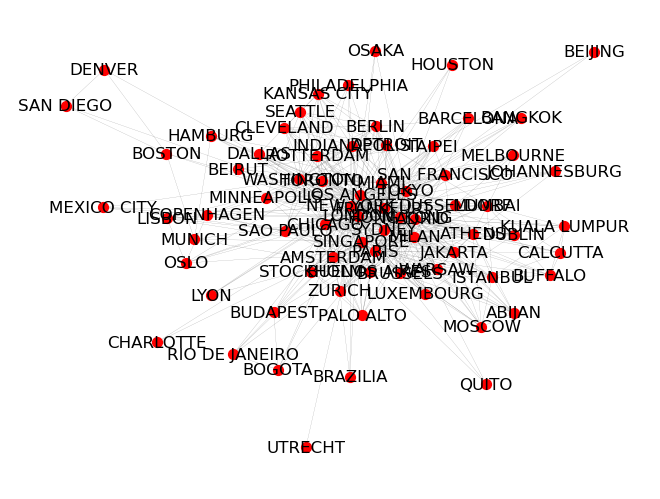

In [18]:
networkx.draw_spring(Gnx, node_size = 50, node_color = 'r',
              width = .1, edge_color='#666666',
              label = True, 
              labels = dict(zip(Gnx.nodes(), list(Gnx.nodes()))))

In [19]:
wcn_ll = pandas.read_csv('wcn-cities-ll.csv', index_col=0)

In [20]:
ll = []
for n in Gnx.nodes():
    lon = wcn_ll.loc[n]['LONGITUDE']
    lat = wcn_ll.loc[n]['LATITUDE']
    Gnx.nodes[n]['lat'] = lat
    Gnx.nodes[n]['lon'] = lon
    ll.append((lon, lat))

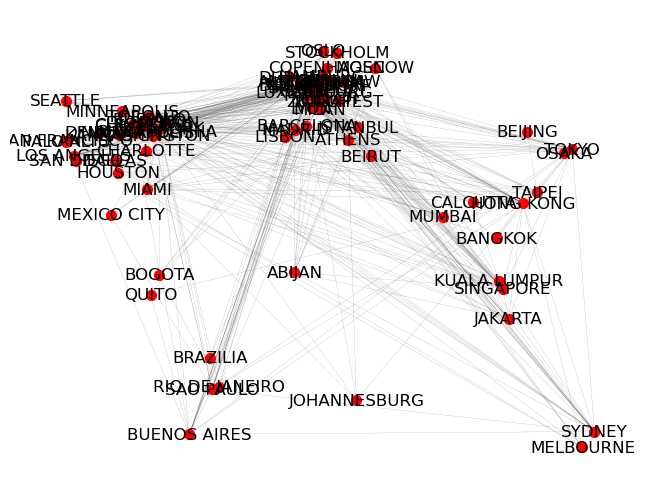

In [22]:
positions = dict(zip(Gnx.nodes(), ll))

networkx.draw(Gnx, pos=positions, 
              node_size=50, node_color='r',
              width=.1, edge_color='#666666',
              label=True, 
              labels=dict(zip(Gnx.nodes(), list(Gnx.nodes()))))

In [23]:
networkx.readwrite.gml.write_gml(Gnx, 'wcn.gml')
networkx.readwrite.graphml.write_graphml(Gnx, 'wcn.graphml')

## Code to geographically project the network
### Particularly to show edges as geodesics (i.e. great circle paths)

In [24]:
import math

R = 6371.007 #km

# Forward projection is distance and (initial) bearing 
# from lon0, lat0 to lon1, lat 1
# Use the Haversine formulae
def get_distance(lon0, lat0, lon1, lat1):
    lon0 = math.radians(lon0)
    lon1 = math.radians(lon1)
    lat0 = math.radians(lat0)
    lat1 = math.radians(lat1)
    dlon = lon1 - lon0
    dlat = lat1 - lat0
    a = math.sin(dlat / 2) * math.sin(dlat / 2) + \
        math.cos(lat0) * math.cos(lat1) * \
        math.sin(dlon / 2) * math.sin(dlon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    b = math.atan2(math.sin(dlon) * math.cos(lat1), math.cos(lat0) * 
                   math.sin(lat1) - math.sin(lat0) * math.cos(lat1) * 
                   math.cos(dlon))
    return R * c #, R * c

In [25]:
def get_omerc_projstring(lon1, lat1, lon2, lat2):
    pstring = \
        f"+proj=omerc +lat_1={lat1} +lon_1={lon1} +lat_2={lat2} +lon_2={lon2}"
    return pstring

In [26]:
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import LineString
from shapely.geometry import MultiLineString
from shapely.geometry import MultiPoint

## Make a dateline cut

In [28]:
antimeridian=LineString([(180, y) for y in range(-90, 91, 1)])

def split_at_dateline(points): #, split=antimeridian):
    # make points into a series of LineStrings
    linestrings = [LineString([points[i], points[i + 1]]) for i in range(len(points) - 1)]
    lengths = [ls.length for ls in linestrings]
    intersections = [l > 270 for l in lengths]
    if True in intersections:
        # int(lengths)
        idx = intersections.index(True)
        coords1 = points[:idx]
        coords2 = points[idx+1:]
        if len(coords1) > 1 and len(coords2) > 1:
            return MultiLineString([coords1, coords2])
        elif len(coords1) == 1 and len(coords2) == 1:
            return MultiPoint(points)
        else:
            if len(coords1) > len(coords2):
                return LineString(coords1)
            else:
                return LineString(coords2)
    else:
        return LineString(points)

### Code to make dense geodesics

In [29]:
geodesics = [] # list of lat-lon pairs as LineStrings
dense_geodesics = [] # list of LineStrings along the geodesic
cut_geodesics = [] # list of the geodesics cut at the dateline

In [30]:
# the steps along the geodesic
step_length= 100 # km

# iterate over the edges
for e in Gnx.edges():
    p1 = Point(Gnx.nodes[e[0]]['lon'], Gnx.nodes[e[0]]['lat'])
    p2 = Point(Gnx.nodes[e[1]]['lon'], Gnx.nodes[e[1]]['lat'])
    geodesics.append(LineString([p1, p2]))
    
    dist = get_distance(p1.x, p1.y, p2.x, p2.y)
    # determine the number of steps
    nsteps = math.ceil(dist / step_length) 
    
    # make a geodataframe of the geodesic
    gdf = geopandas.GeoDataFrame(geometry=[p1, p2])
    gdf.crs = {'init': 'epsg:4326'}

    # project it oblique mercator with the geodesic as the central meridian
    projstring = get_omerc_projstring(p1.x, p1.y, p2.x, p2.y)
    gdf = gdf.to_crs(projstring)
    # retrieve the points in the projected space
    p1 = gdf.loc[0]['geometry']
    p2 = gdf.loc[1]['geometry']
    # now step along them
    x_step = (p2.x - p1.x) / nsteps
    y_step = (p2.y - p1.y) / nsteps
    dense_geodesic = LineString([(p1.x + x_step * i, p1.y + y_step * i) for i in range(nsteps + 1)]) 
    
    # make up the new geodataframe and project it back to 4326
    gdf = geopandas.GeoDataFrame(geometry=geopandas.GeoSeries(dense_geodesic))
    gdf.crs = projstring
    gdf = gdf.to_crs({'init': 'epsg:4326'})

    # append the dense geodesic (uncut and cut) to the lists
    dense_geodesic = gdf.geometry[0].coords
    dense_geodesics.append(LineString(dense_geodesic))
    cut_geodesic = split_at_dateline(dense_geodesic)
    cut_geodesics.append(cut_geodesic)

/Users/osullid3/miniconda3/envs/cg/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/osullid3/miniconda3/envs/cg/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/osullid3/miniconda3/envs/cg/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the

In [31]:
# Make up GDFs
geodesics_gdf = geopandas.GeoDataFrame(geometry=geopandas.GeoSeries(geodesics))
geodesics_gdf.crs={'init': 'epsg:4326'}

geodesics_dense_gdf = geopandas.GeoDataFrame(geometry=geopandas.GeoSeries(dense_geodesics))
geodesics_dense_gdf.crs={'init': 'epsg:4326'}

geodesics_cut_gdf = geopandas.GeoDataFrame(geometry=geopandas.GeoSeries(cut_geodesics))
geodesics_cut_gdf.crs={'init': 'epsg:4326'}

/Users/osullid3/miniconda3/envs/cg/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/osullid3/miniconda3/envs/cg/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/osullid3/miniconda3/envs/cg/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the

## Mollweide fail maps

/Users/osullid3/miniconda3/envs/cg/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


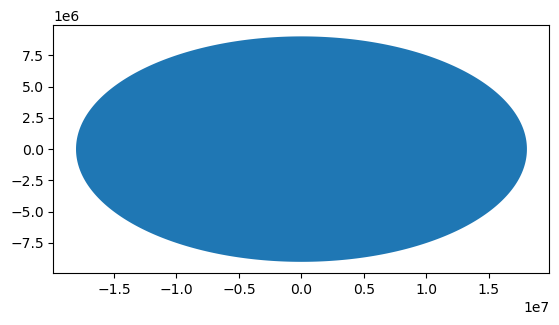

In [33]:
moll = '+proj=moll'

globe = Polygon(LineString([Point(-180, y) for y in [_/10 for _ in range(-900, 901)]] + 
                           [Point(180, y) for y in [_/10 for _ in range(900, -901, -1)]]))
globe_gdf = geopandas.GeoDataFrame(geometry=geopandas.GeoSeries([globe]))
globe_gdf.crs = {'init': 'epsg:4326'}
globe_m = globe_gdf.to_crs(moll)
globe_m.plot()

countries = geopandas.read_file("ne-world.gpkg")

<Axes: >

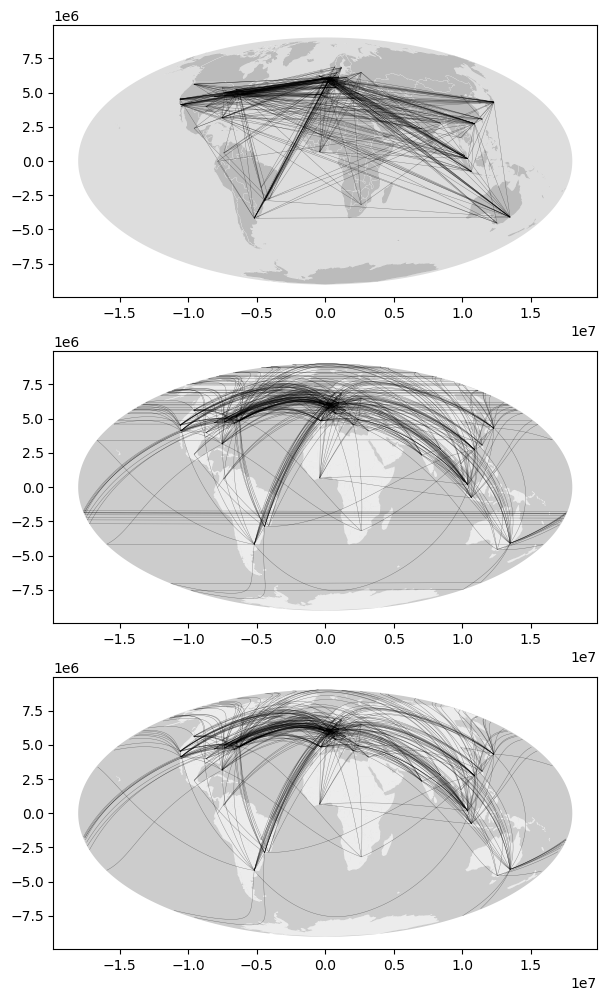

In [34]:
countries_m = countries.to_crs(moll)
geodesics_m1 = geodesics_gdf.to_crs(moll)
geodesics_m2 = geodesics_dense_gdf.to_crs(moll)
geodesics_m3 = geodesics_cut_gdf.to_crs(moll)

fig = pyplot.figure(figsize=(12,12))
ax = fig.add_subplot(311)
globe_m.plot(ax=ax, facecolor='#dddddd')
countries_m.plot(ax=ax, color='#bbbbbb', edgecolor='w', linewidth=0.1)
geodesics_m1.plot(ax=ax, color='k', alpha=0.5, linewidth=0.25)
ax = fig.add_subplot(312)
globe_m.plot(ax=ax, facecolor='#cccccc')
countries_m.plot(ax=ax, color='#ececec', edgecolor='w', linewidth=0.1)
geodesics_m2.plot(ax=ax, color='k', alpha=0.5, linewidth=0.25)
ax = fig.add_subplot(313)
globe_m.plot(ax=ax, facecolor='#cccccc')
countries_m.plot(ax=ax, color='#ececec', edgecolor='w', linewidth=0.1)
geodesics_m3.plot(ax=ax, color='k', alpha=0.5, linewidth=0.25)
# pyplot.savefig('y.svg')

## Orthographic not so fail maps

<Axes: >

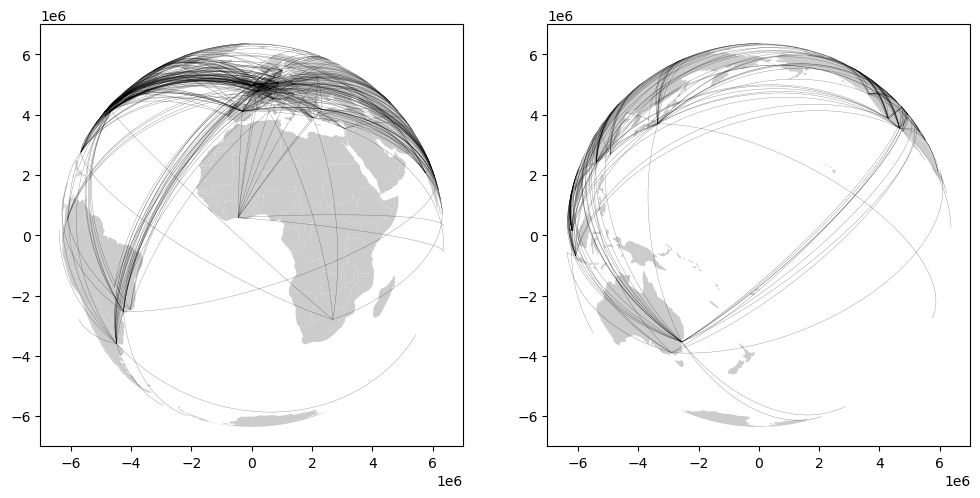

In [38]:
atlantic = '+proj=ortho +lon_0=0 +lat_0=0'
pacific = '+proj=ortho +lon_0=180 +lat_0=0'
countries_a = geopandas.read_file('front.gpkg').to_crs(atlantic)
countries_p = geopandas.read_file('back.gpkg').to_crs(pacific)
geodesics_a = geodesics_dense_gdf.to_crs(atlantic)
geodesics_p = geodesics_dense_gdf.to_crs(pacific)

fig = pyplot.figure(figsize=(12,6))
ax = fig.add_subplot(121)
countries_a.plot(ax=ax, color='#cccccc')
geodesics_a.plot(ax=ax, color='k', alpha=0.5, linewidth=0.25)
ax = fig.add_subplot(122)
countries_p.plot(ax=ax, color='#cccccc')
geodesics_p.plot(ax=ax, color='k', alpha=0.5, linewidth=0.25)
# pyplot.savefig('x.svg')

In [45]:
Gnx = make_network_from_incidence_table(cuts[3])

In [46]:
from networkx.algorithms import community

list(community.greedy_modularity_communities(Gnx))

[frozenset({'ABIJAN',
            'ABU DHABI',
            'ADELAIDE',
            'AMMAN',
            'AMSTERDAM',
            'ANTWERP',
            'ATHENS',
            'ATLANTA',
            'AUCKLAND',
            'BALTIMORE',
            'BANGALORE',
            'BANGKOK',
            'BARCELONA',
            'BASEL',
            'BEIJING',
            'BEIRUT',
            'BERLIN',
            'BERN',
            'BILBAO',
            'BIRMINGHAM',
            'BOGOTA',
            'BOLOGNA',
            'BORDEAUX',
            'BOSTON',
            'BRATISLAVA',
            'BRAZILIA',
            'BRISBANE',
            'BRISTOL',
            'BRUSSELS',
            'BUCHAREST',
            'BUDAPEST',
            'BUENOS AIRES',
            'BUFFALO',
            'CAIRO',
            'CALCUTTA',
            'CALGARY',
            'CAPE TOWN',
            'CARACAS',
            'CASABLANCA',
            'CHARLOTTE',
            'CHENNAI',
            'CHICAGO',
            

# igraph stuff

In [163]:
Gig = igraph.Graph.Read_GML('wcn.gml')
Gig.vs['size'] = Gig.degree(Gig.vs)

In [164]:
xy_layout = igraph.layout.Layout(zip(Gig.vs['x'], [-lat for lat in Gig.vs['y']]))

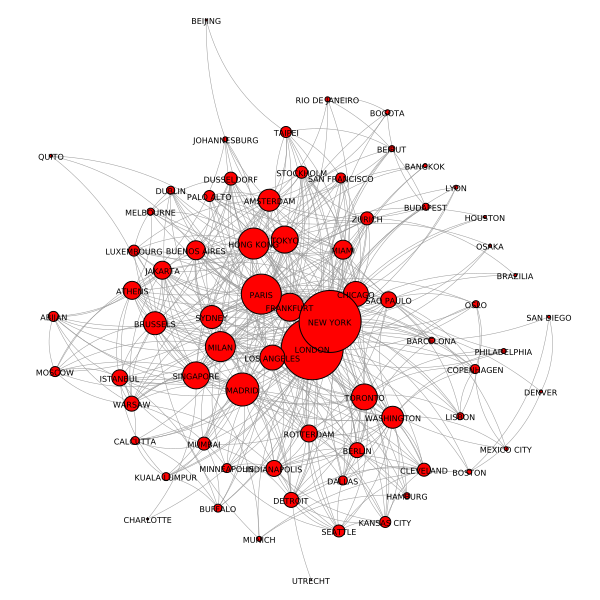

In [170]:
igraph.drawing.plot(Gig, target='z.svg', layout=Gig.layout('kk'),  vertex_label_size=8, vertex_opacity=.5,
                    edge_width=0.5, edge_color='#999', 
                    edge_curved=.25, keep_aspect_ratio=True)

In [ ]:
countries.geometry

In [106]:
from shapely.geometry import Polygon

bbox = [Point(-90, y) for y in range(-90,91)] + [Point(90, y) for y in range(90,-91,-1)] 
bbox = Polygon(LineString(bbox))
hemisphere = geopandas.GeoDataFrame(geometry=[bbox])
hemisphere.to_file('hemisphere.shp')

# Code to geocode _most_ of the cities from Natural Earth populated places

In [31]:
city_map = geopandas.read_file('ne_10m_populated_places.shp')[['name_en', 'LATITUDE', 'LONGITUDE', 'geometry']]

city_map = city_map.dropna()
city_map['NAME'] = [s.upper() for s in city_map.name_en]

lat_longs = pandas.DataFrame({'city': wcn.index})

lat_longs = pandas.merge(lat_longs, city_map, 
                         left_on='city', right_on='NAME', how='left')

lat_longs.shape

pyplot.plot(lat_longs.LONGITUDE, lat_longs.LATITUDE, 'k.')

lat_longs.to_csv('ll.csv')

DriverError: ne_10m_populated_places.shp: No such file or directory

In [32]:
city_map = city_map.to_crs('+proj=ob_tran +o_proj=cea +o_lon_p=-10 +o_lat_p=45 +lon_0=0')
city_map.plot(markersize=.5)


NameError: name 'city_map' is not defined

In [109]:
len(Gnx.nodes())

72

In [110]:
len(Gnx.edges())

505

# Code to cut network down to just the US lower 48

In [276]:
us48 = geopandas.read_file('states.shp')
us48['USA'] = 1
us48 = us48.dissolve(by='USA', as_index=False)
us48 = us48.to_crs({'init': 'epsg:4326'})
usa = us48.geometry[0]

us_cities = [name for name, lon, lat in zip(wcn_ll.index, wcn_ll.LONGITUDE, wcn_ll.LATITUDE) if usa.contains(Point(lon, lat))]

wcn_us = wcn[wcn.index.isin(us_cities)]
wcn_us

cuts_us = dict(zip(range(1, 6), [cut_table_at(wcn_us, x) for x in range(1, 6)]))
network_us = cuts_us[4]

## The pandas table is an incidence matrix
incidence_matrix = numpy.array(network_us) 

## Do matrix multiplication to make it into an adjacency matrix
adj_matrix = incidence_matrix.dot(incidence_matrix.transpose())
## Throw away the self-loop diagonal entries
numpy.fill_diagonal(adj_matrix, 0)

Gnx_us = networkx.Graph(adj_matrix)
Gnx_us = networkx.relabel_nodes(Gnx_us, dict(zip(Gnx_us.nodes(), list(network_us.index))))

networkx.readwrite.gml.write_gml(Gnx_us, 'wcn-us.gml')